In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.callbacks import Callback
from keras.models import Model
from Data import DataLoader
from DataLoader import Data
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
import pickle
from MMR_Feature_Extract import MMR_Selection
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
df=Data.load_data('music.csv')

trainx,testx,trainy,testy=Data.prepare_data(df,label_dict={
    'final_blues':0,
    'final_classical':1,
    'final_country':2,
    'final_disco':3,
    'final_hiphop':4,
    'final_jazz':5,
    'final_metal':6,
    'final_pop':7,
    'final_reggae':8,
    'final_rock':9
    
})    

def apply_valid(valid_data,index_list):
    valid_data=valid_data[:,index_list]
    return valid_data

Data Loaded, Shape : 10000 ,343


In [12]:
data=MMR_Selection(trainx,trainy,alpha=0.5)
indices,trainx=data.get_cols(matrix=trainx,num_features=100)
trainx=trainx[:,indices]
validx=apply_valid(valid_data=testx,index_list=indices)
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=10)

# Train the classifier on the training data
xgb_classifier.fit(trainx,trainy)

# Make predictions on the test data
y_pred = xgb_classifier.predict(validx)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(testy, y_pred)
f1_=f1_score(testy,y_pred)
print("Accuracy:", accuracy)
print("F1 Score:", f1_)


0.9237052342596727

In [ ]:
label_names = {
    0: 'Blues',
    1: 'Classical',
    2: 'Country',
    3: 'Disco',
    4: 'Hiphop',
    5: 'Jazz',
    6: 'Metal',
    7: 'Pop',
    8: 'Reggae',
    9: 'Rock'
}


# Calculate the confusion matrix
cm = confusion_matrix(testy, y_pred)

# Create a custom color palette with black text and white background
custom_colors = sns.color_palette("YlOrRd", as_cmap=True)

# Create a heatmap for the confusion matrix with custom colors
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap=custom_colors, cbar=False,
            annot_kws={"size": 12, "color": "black"}, linewidths=0.5, square=True)

# Set x and y tick labels with the corresponding label names
plt.xticks(np.arange(len(label_names)), [label_names[i] for i in range(len(label_names))], rotation=45)
plt.yticks(np.arange(len(label_names)), [label_names[i] for i in range(len(label_names))], rotation=0)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

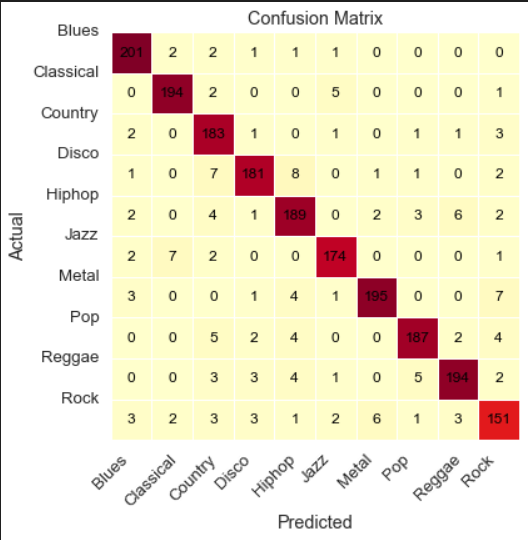